In [194]:
import pandas as pd
from tqdm.notebook import tqdm
from IPython.display import Image
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
tqdm.pandas()

In [92]:
dns_analysis_bn = BayesianNetwork([
    ('answer_matches_probe_cc', 'answer_is_blockpage'),
    ('answer_matches_probe_asn', 'answer_is_blockpage'),
    ('answer_contains_unreachable_ip', 'answer_is_blockpage'),
    ('answer_contains_bogon', 'answer_is_blockpage'),
    ('answer_is_blockpage', 'contains_tls_consistent_answer'),
    ('answer_count', 'answer_is_blockpage'),
    ('answer_is_cloud_provider', 'answer_is_blockpage'),
    #('contains_tls_consistent_answer', 'dns_outcome'),
    #('bogon_present_in_ctrl_and_exp', 'dns_outcome'),

    #('dns_consistent_failure', 'dns_failure_outcome'),
    #('dns_exp_is_nxdomain', 'dns_failure_outcome'),
    #('dns_failure_outcome', 'dns_outcome')
])

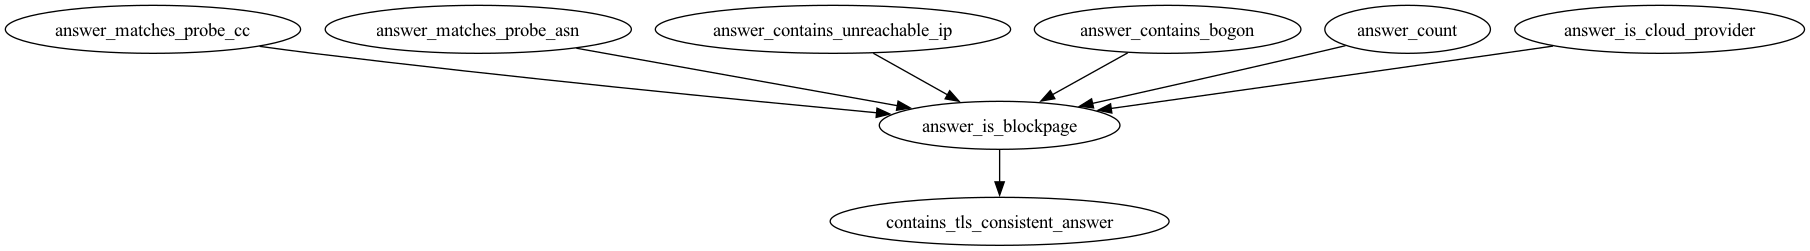

In [95]:
viz = dns_analysis_bn.to_graphviz()
viz.draw('dns_analysis_bn.png', prog='dot')
Image('dns_analysis_bn.png')

In [93]:
samples = pd.read_csv('dns_analysis_samples_1M.csv.gz', usecols=[
    'answer_matches_probe_cc',
    'answer_matches_probe_asn',
    'answer_contains_unreachable_ip',
    'answer_contains_bogon',
    'answer_is_blockpage', 
    'contains_tls_consistent_answer',
    'answer_is_cloud_provider',
    'answer_count',
])

In [166]:
#samples_full = pd.read_csv('dns_analysis_samples_1M.csv.gz')
samples_extra = pd.read_csv('dns_analysis_samples_extra_1M.csv.gz')

In [171]:
samples_extra

,Unnamed: 0,target_domain_name,measurement_uid,probe_cc,probe_asn,answer_count_num,answer_count,tls_consistent,tls_inconsistent,contains_tls_consistent_answer,...,answer_asn_in_trusted_answers,answer_asorg_in_trusted_answers,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,fp_name,false_postive,answer_is_blockpage,answer_contains_unreachable_ip
0,0,www.coolearth.org,20240813184519.240242_RU_webconnectivity_70834...,RU,51645,2,med,1,0,1.0,...,1,0,0,0,0,1,NaN,0,0,0
1,1,kat.am,20240415213315.451159_US_webconnectivity_cd858...,US,14593,4,med,1,0,1.0,...,1,0,0,1,0,1,NaN,0,0,0
2,2,www.mediafire.com,20240110154226.561973_US_webconnectivity_0b177...,US,11427,2,med,1,0,1.0,...,0,0,0,1,0,1,NaN,0,0,0
3,3,iarf.net,20240226153534.729299_US_webconnectivity_bfd46...,US,7922,1,low,1,0,1.0,...,0,0,0,0,0,0,NaN,0,0,0
4,4,scontent.cdninstagram.com,20240401223202.866879_TW_webconnectivity_d5764...,TW,7482,2,med,1,0,1.0,...,1,1,0,0,0,0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,focus.ua,20240306235145.238486_RU_webconnectivity_081e7...,RU,41733,2,med,0,0,NaN,...,0,0,0,1,0,0,ooni.ru_dns_ert_1,0,1,0
999996,999996,notifications-pa.googleapis.com,20240101041556.484562_VE_webconnectivity_8657f...,VE,8048,14,high,0,0,NaN,...,0,0,0,0,0,0,NaN,0,0,0
999997,999997,www.piratpartiet.se,20240302005730.751251_MX_webconnectivity_2950b...,MX,28509,2,med,0,0,NaN,...,0,0,0,0,0,0,NaN,0,0,0
999998,999998,transequality.org,20240307184001.974720_TZ_webconnectivity_6a91b...,TZ,37133,4,med,0,0,NaN,...,1,1,0,0,0,1,NaN,0,0,0


In [182]:
samples_extra_clean = samples_extra.drop(columns=[samples_extra.columns[idx] for idx in range(6)] + ['fp_name', 'false_postive'])

In [183]:
samples_extra_clean

,answer_count,tls_consistent,tls_inconsistent,contains_tls_consistent_answer,answer_ip_in_trusted_answers,answer_asn_in_trusted_answers,answer_asorg_in_trusted_answers,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip
0,med,1,0,1.0,0,1,0,0,0,0,1,0,0
1,med,1,0,1.0,1,1,0,0,1,0,1,0,0
2,med,1,0,1.0,0,0,0,0,1,0,1,0,0
3,low,1,0,1.0,0,0,0,0,0,0,0,0,0
4,med,1,0,1.0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,med,0,0,NaN,0,0,0,0,1,0,0,1,0
999996,high,0,0,NaN,0,0,0,0,0,0,0,0,0
999997,med,0,0,NaN,0,0,0,0,0,0,0,0,0
999998,med,0,0,NaN,1,1,1,0,0,0,1,0,0


In [164]:
samples_full.iloc[2007]['measurement_uid']

'20240212194929.466091_FI_webconnectivity_a8a12429797483d9'

In [108]:
samples[
    samples['answer_contains_unreachable_ip'] != 0
]

,answer_count,contains_tls_consistent_answer,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip


In [102]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model=dns_analysis_bn, data=samples)
dns_analysis_bn.fit(data=samples, estimator=MaximumLikelihoodEstimator)

In [106]:
cdp = dns_analysis_bn.get_cpds('answer_contains_unreachable_ip')

In [107]:
print(cdp)

+-----------------------------------+---+
| answer_contains_unreachable_ip(0) | 1 |
+-----------------------------------+---+


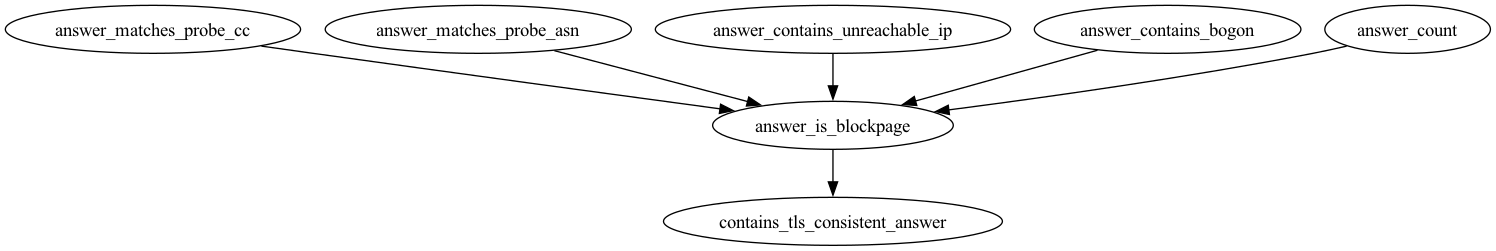

In [14]:
viz = dns_analysis_bn.to_graphviz()
viz.draw('dns_analysis_bn.png', prog='dot')
Image('dns_analysis_bn.png')

In [38]:
dns_analysis_bn

,Unnamed: 0,target_domain_name,measurement_uid,probe_cc,probe_asn,answer_count,tls_consistent,tls_inconsistent,contains_tls_consistent_answer,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,fp_name,false_postive,answer_is_blockpage,answer_contains_unreachable_ip
0,0,porvir.org,20240225113555.207055_BR_webconnectivity_220a8...,BR,270476,4,0,0,NaN,0,0,0,NaN,0,0,0
1,1,kiwifarms.net,20240212223944.798890_BR_webconnectivity_ac6a7...,BR,263260,2,1,0,1.0,0,0,0,NaN,0,0,0
2,2,www.cidh.org,20240128161747.782557_ID_webconnectivity_e6e4e...,ID,7713,6,0,0,NaN,0,0,0,NaN,0,0,0
3,3,www.privacytools.io,20240219103350.429741_US_webconnectivity_93aab...,US,7922,4,1,0,1.0,0,1,0,NaN,0,0,0
4,4,www.mojeek.com,20240403001615.591322_US_webconnectivity_18b05...,US,7922,1,1,0,1.0,0,0,0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,www.4chan.org,20240112190421.724404_IN_webconnectivity_0d9ba...,IN,24309,2,1,0,1.0,0,0,0,NaN,0,0,0
99996,99996,reliefweb.int,20240811082327.907258_BD_webconnectivity_ee069...,BD,135341,3,1,0,1.0,0,0,0,NaN,0,0,0
99997,99997,www.youtube.com,20240119184933.212646_US_webconnectivity_7fa02...,US,7922,19,1,0,1.0,0,1,0,NaN,0,0,0
99998,99998,www.churchofeuthanasia.org,20240209233935.331137_US_webconnectivity_c059b...,US,20057,1,1,0,1.0,0,1,0,NaN,0,0,0


In [149]:
samples.head()

,answer_count,contains_tls_consistent_answer,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip
0,med,1.0,0,1,0,0,0,0
1,med,1.0,0,0,0,1,0,0
2,high,1.0,0,1,0,1,0,0
3,med,NaN,0,1,0,0,0,0
4,med,1.0,0,0,0,1,0,0


In [184]:
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score
from pgmpy.sampling import BayesianModelSampling
est = PC(data=samples_extra_clean)
estimated_model = est.estimate(variant="stable", max_cond_vars=4)
#estimated_model = est.estimate(variant="orig", max_cond_vars=4)





  0%|                                                                                              | 0/4 [00:00<?, ?it/s]



Working for n conditional variables: 0:   0%|                                                      | 0/4 [00:00<?, ?it/s]



Working for n conditional variables: 0:  25%|███████████▌                                  | 1/4 [00:03<00:09,  3.06s/it]



Working for n conditional variables: 1:  25%|███████████▌                                  | 1/4 [00:03<00:09,  3.06s/it]



Working for n conditional variables: 1:  50%|███████████████████████                       | 2/4 [01:04<01:14, 37.15s/it]



Working for n conditional variables: 2:  50%|███████████████████████                       | 2/4 [01:04<01:14, 37.15s/it]INFO:pgmpy:Skipping the test answer_count ⟂ contains_tls_consistent_answer | tls_consistent=0, tls_inconsistent=0. Not enough samples
INFO:pgmpy:Skipping the test answer_count ⟂ contains_tls_consistent_answer | tls_inconsistent=0, tls_consistent=0. N

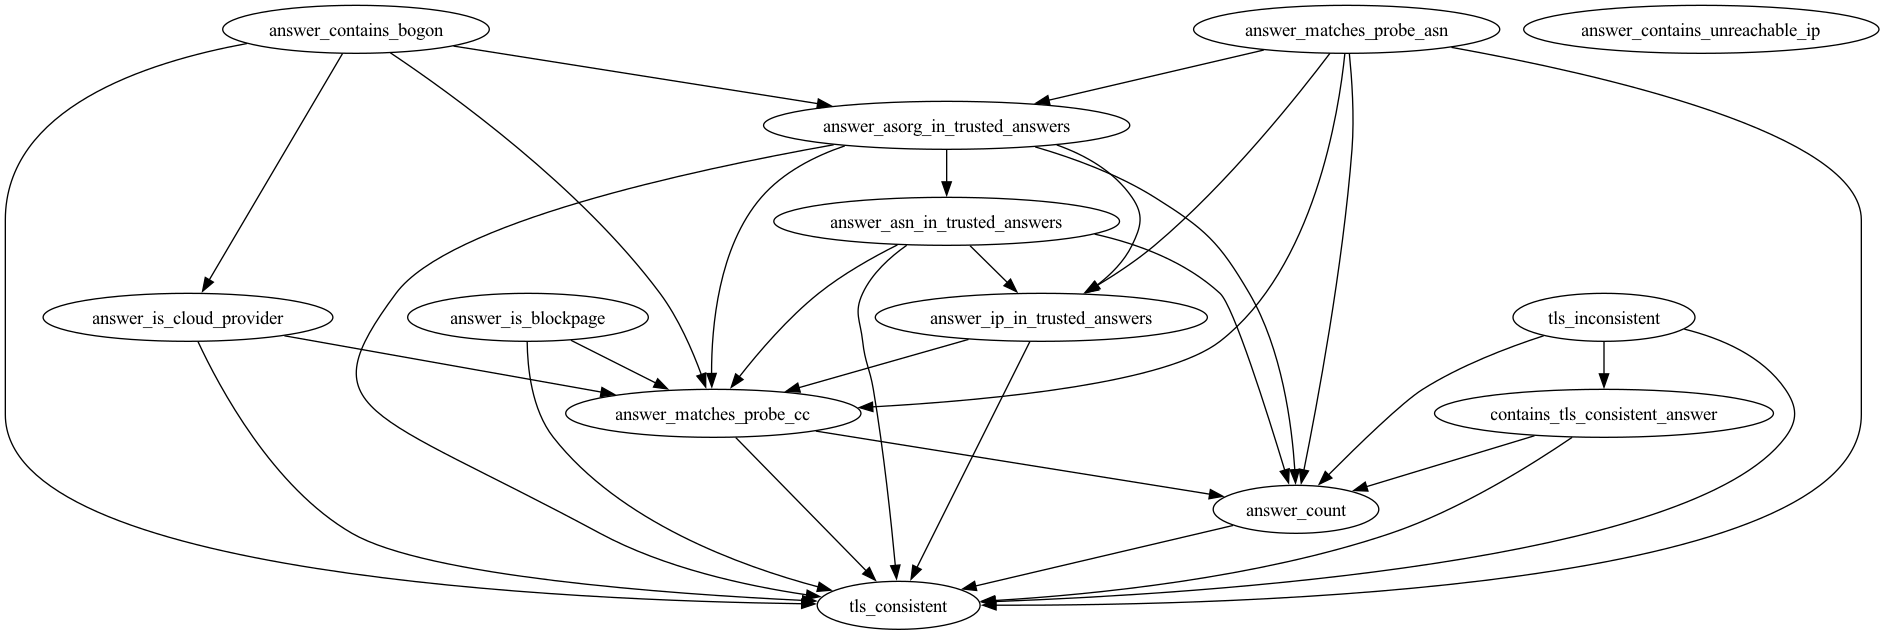

In [186]:
viz = estimated_model.to_graphviz()
viz.draw('estimated_extra_pc_stable_1M.png', prog='dot')
Image('estimated_extra_pc_stable_1M.png')

In [200]:
samples_extra_clean

,answer_count,tls_consistent,tls_inconsistent,contains_tls_consistent_answer,answer_ip_in_trusted_answers,answer_asn_in_trusted_answers,answer_asorg_in_trusted_answers,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip
0,med,1,0,1.0,0,1,0,0,0,0,1,0,0
1,med,1,0,1.0,1,1,0,0,1,0,1,0,0
2,med,1,0,1.0,0,0,0,0,1,0,1,0,0
3,low,1,0,1.0,0,0,0,0,0,0,0,0,0
4,med,1,0,1.0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,med,0,0,NaN,0,0,0,0,1,0,0,1,0
999996,high,0,0,NaN,0,0,0,0,0,0,0,0,0
999997,med,0,0,NaN,0,0,0,0,0,0,0,0,0
999998,med,0,0,NaN,1,1,1,0,0,0,1,0,0


In [225]:
samples_extra_clean_part = samples_extra_clean.copy()[:100]

In [226]:
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
bn_estimated_pc = BayesianNetwork(estimated_model)
bn_estimated_pc.fit(data=samples_extra, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(bn_estimated_pc)
def infer_blockpage_2(row):
    evidence = {}
    for key in row.keys():
        if key != 'answer_is_blockpage' and not pd.isnull(row[key]):
            evidence[key] = row[key]
    res = infer.query(['answer_is_blockpage'], evidence=evidence)
    row['answer_is_blockpage_0'] = res.values[0]
    row['answer_is_blockpage_1'] = res.values[1]
    return row
samples_extra_clean_part = samples_extra_clean_part.apply(infer_blockpage_2, axis=1)

/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: Runtime

In [241]:
len(bn_estimated_pc.get_cpds('tls_consistent').get_evidence())

0

In [242]:
len(a[0])

3072

In [246]:
2**10*3

3072

In [218]:
samples_extra.iloc[16]['measurement_uid']

'20240220062610.565789_VE_webconnectivity_0b7437bb2801006a'

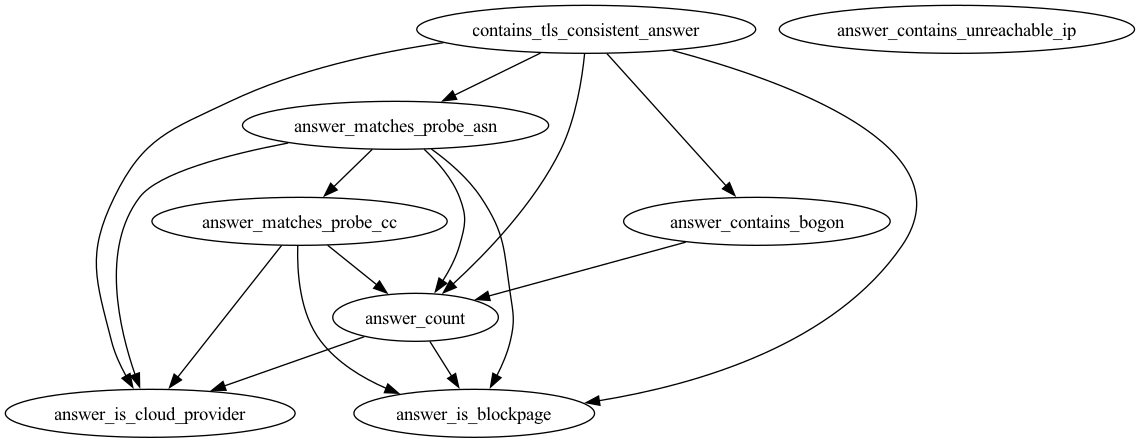

In [150]:
viz = estimated_model.to_graphviz()
viz.draw('estimated_pc_stable_1M.png', prog='dot')
Image('estimated_pc_stable_1M.png')

In [151]:
from pgmpy.estimators import MaximumLikelihoodEstimator
bn_estimated_pc = BayesianNetwork(estimated_model)
bn_estimated_pc.fit(data=samples, estimator=MaximumLikelihoodEstimator)

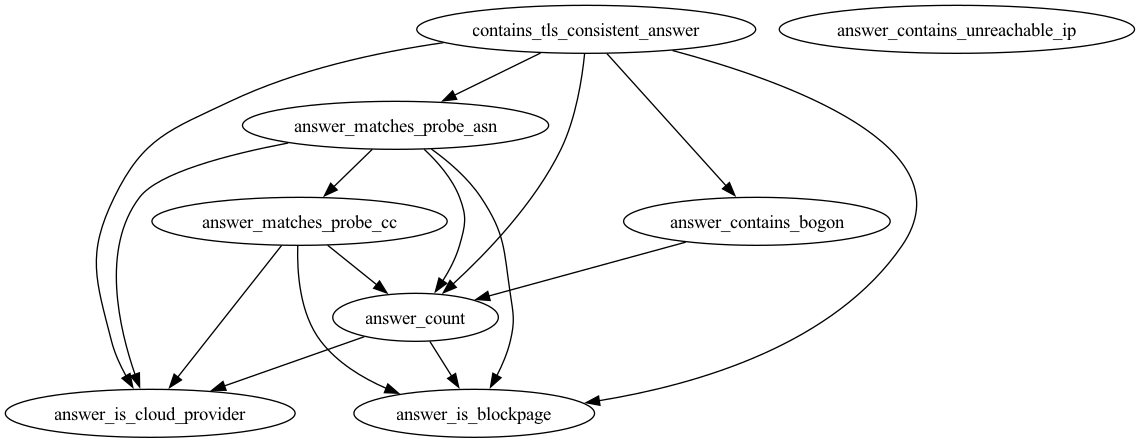

In [152]:
viz = bn_estimated_pc.to_graphviz()
viz.draw('estimated_pc_stable_1M.png', prog='dot')
Image('estimated_pc_stable_1M.png')

In [153]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bn_estimated_pc)

In [189]:
print(infer.query(['answer_is_blockpage']))

+------------------------+----------------------------+
| answer_is_blockpage    |   phi(answer_is_blockpage) |
+========================+============================+
| answer_is_blockpage(0) |                     0.9992 |
+------------------------+----------------------------+
| answer_is_blockpage(1) |                     0.0008 |
+------------------------+----------------------------+


In [154]:
bn_estimated_pc

In [155]:
samples_inference = samples.copy()

In [ ]:
estimated_model

In [156]:
def infer_blockpage(row):
    evidence = {}
    for key in ['answer_count', 'contains_tls_consistent_answer',
       'answer_matches_probe_asn', 'answer_matches_probe_cc',
       'answer_contains_bogon', 'answer_is_cloud_provider',
       'answer_contains_unreachable_ip']:
        if not pd.isnull(row[key]):
            evidence[key] = row[key]
    res = infer.query(['answer_is_blockpage'], evidence=evidence)
    return res.values[0]
samples_inference['answer_is_blockpage_prob'] = samples_inference.apply(infer_blockpage, axis=1)

In [202]:
samples_inference[
    samples_inference['answer_is_blockpage_prob'] < 0.8
]

,answer_count,contains_tls_consistent_answer,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip,answer_is_blockpage_prob
2007,med,0.0,1,0,0,0,0,0,0.755245
5940,low,0.0,1,0,0,0,1,0,0.518519
11714,low,0.0,1,0,0,0,1,0,0.518519
12383,low,0.0,1,0,0,0,0,0,0.518519
15567,low,0.0,1,0,0,0,1,0,0.518519
...,...,...,...,...,...,...,...,...,...
985012,low,0.0,1,0,0,0,0,0,0.518519
994973,low,0.0,1,0,0,0,1,0,0.518519
998252,low,0.0,1,0,0,0,1,0,0.518519
999409,low,0.0,1,0,0,0,0,0,0.518519


In [165]:
samples_inference[
    samples_inference['answer_is_blockpage'] == 1
]

,answer_count,contains_tls_consistent_answer,answer_matches_probe_asn,answer_matches_probe_cc,answer_contains_bogon,answer_is_cloud_provider,answer_is_blockpage,answer_contains_unreachable_ip,answer_is_blockpage_prob
192,low,NaN,1,0,0,0,1,0,0.832334
576,med,NaN,0,0,1,0,1,0,0.997029
684,low,NaN,0,1,0,0,1,0,0.994409
912,med,NaN,1,0,0,0,1,0,0.960802
1077,low,NaN,0,1,0,0,1,0,0.994409
...,...,...,...,...,...,...,...,...,...
999517,low,NaN,0,0,1,0,1,0,0.999102
999634,low,NaN,0,0,1,0,1,0,0.999102
999698,med,0.0,1,0,0,0,1,0,0.755245
999869,low,NaN,0,0,1,0,1,0,0.999102


In [110]:
scoring_method = K2Score(data=subsamples)
est = HillClimbSearch(data=subsamples)
estimated_model = est.estimate(
    scoring_method=scoring_method
)



  0%|                                                                                        | 0/1000000 [00:00<?, ?it/s]

  0%|                                                                             | 1/1000000 [00:00<39:28:13,  7.04it/s]

  0%|                                                                             | 11/1000000 [00:00<8:50:55, 31.39it/s]


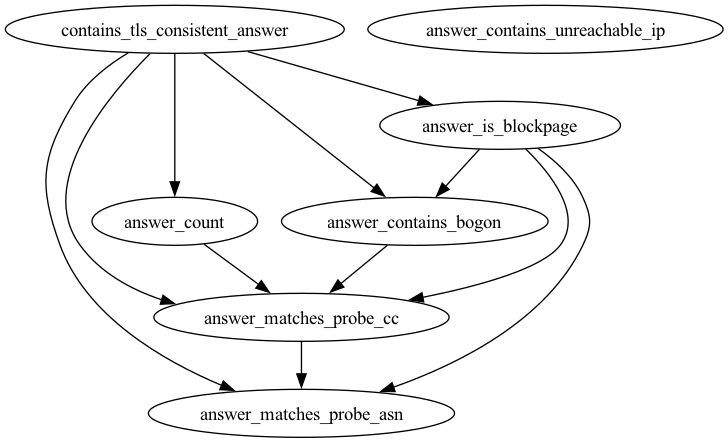

In [111]:
viz = estimated_model.to_graphviz()
viz.draw('estimated_hillclimb_1M.png', prog='dot')
Image('estimated_hillclimb_1M.png')

In [ ]:
cpd_answer_matches_probe_cc = TabularCPD(
    "answer_matches_probe_cc",
    variable_card=2,
    values=[
        [0.77],
        [0.23],
    ],
    state_names={
        "answer_matches_probe_cc": ['t', 'f']
    },
)

cpd_contains_unreachable_answer = TabularCPD(
    "answer_contains_unreachable_ip",
    variable_card=2,
    values=[
        [0.15],
        [0.85],
    ],
    state_names={
        "answer_contains_unreachable_ip": ['t', 'f']
    },
)

cpd_contains_unreachable_answer = TabularCPD(
    "answer_contains_bogon",
    variable_card=2,
    values=[
        [0.015],
        [0.985],
    ],
    state_names={
        "answer_contains_bogon": ['t', 'f']
    },
)


cpd_contains_unreachable_answer = TabularCPD(
    "answer_is_blockpage",
    variable_card=2,
    values=[
        [0.015],
        [0.985],
    ],
    evidence=["answer_contains_bogon", "answer_contains_unreachable_ip", "answer_matches_probe_cc"],
    evidence_card=[3, 3],
    state_names={
        "answer_is_blockpage": ['t', 'f']
    },
)